## White Noise and Linear Time Series

A time series a called white noise if it is a sequence of i.i.d. random variables with mean 0 and finite variance, and it is Gaussian white noise if the distribution is Gaussian. 

A time series is called linear if $r_t = \mu + \sum_{i=0}^{\infty} \phi_ia_{t-i}$.

## Stationarity and Autocorrelation

- Strict stationarity: for any $k>0$, the joint distrbution of $\{ r_{t_1}, \dots, r_{t_k}\}$ is the same as that of $\{ r_{t_1+t}, \dots, r_{t_k+t}\}$ for any $t\geq 0$.
- Weak stationarity: $E(r_t) = \mu$ and $Cov(r_t, r_{t-k})=\gamma_k$ only depends on $k$.

Autocorrelations are defined to be $\rho_k = Corr(r_t, r_{t-k})$. Plot of sample autocorrelations is called autocorrelation plot. If $\{r_t\}$ is white noise plus a constant, then as the total time period $T\rightarrow\infty$, the sample autocorrelation for all $k$ is asymptotically Gaussian with mean 0 and variance $1/T$.

### Bartlett Test - confidence interval for 'out-of-order' sample autocorrelations

If $r_t$ is a weakly stationary series with $r_t = \mu + \sum_{i=0}^{q}\phi_i a_{t−i}$, $
\phi_0 = 1$, for some Gaussian white noise $a_t$, then for any $k > q$, $\hat{\rho}_k$ is asymptotically normal with mean 0 and variance $(1 + 2\sum_{i=1}^q \rho_i^2)/T$.

### Ljung-Box Test - test for presence of non-zero autocorrelations

$$H_0: \rho_0 = \dots = \rho_m = 0.$$

The test statistic is $Q(m) = T(T+2)\sum_{k=1}^m\frac{\hat{\rho}_k^2}{T-k}$, where $T$ is the length of the time series. Under $H_0$, $Q(m)$ will have a $\chi^2$ distribution with degrees of freedom $m$.

The **Durbin-Watson test** is a hypothesis test for autocorrelation at lag 1.

## AR(p) Model

Specification: $r_t = \phi_0 + \phi_1 r_{t-1} + \dots + \phi_p r_{t-p} + a_t$

- The AR(p) model is weakly stationary if the characteristic roots satisfy $|\omega_k|<1, k=1,\dots, p$.
- If the series is weakly stationary, then $E(r_t)=\frac{\phi_0}{1-\phi_1-\dots-\phi_p}$. 
- Also when it is weakly stationary, $\rho_k = \phi_1\rho_{k-1}+\dots+\phi_p\rho_{k-p}$. One can **estimate model parameters** $\phi$ by solving a system of linear equations of $\hat{\rho}$. This is what the **Yule-Walker equations** is about.
- The **$l$-step forecasting at time $t$** is given by $\hat{r}_t(l)=\phi_0 + \phi_1\hat{r}_t(l-1) + \dots + \phi_p\hat{r}_t(l-p)$, where we denote $\hat{r}_t(l-p)=r_{t+l-p}$ if $l\leq p$. It can be shown that as $l\rightarrow\infty$, $\hat{r}_t(l)\rightarrow E(r_t)$ and $Var(\hat{e}_t(l))\rightarrow Var(r_t)$, where $\hat{e}_t(l)$ is the $l$-step ahead error.
- Consider a sequence of AR models:
\begin{align}
r_t &= \phi_{0, 1} + \phi_{1, 1}r_{t-1} + a_{1t}\\
r_t &= \phi_{0, 2} + \phi_{1, 2}r_{t-1} + \phi_{2, 2}r_{t-2} + a_{2t}\\
r_t &= \phi_{0, 3} + \phi_{1, 3}r_{t-1} + \phi_{2, 3}r_{t-2} + \phi_{3, 3}r_{t-3} + a_{3t}
\end{align}
The estimated diagonal coefficients $\hat{\phi}_{1,1}, \hat{\phi}_{2,2}, \hat{\phi}_{3,3},\dots$ are called the partial autocorrelation coefficients (PACF). If the true model order is $p$, then as the sample size increases, $\hat{\phi}_{l,l}$ should converge to zero, when $l>p$.

## MA(q) Model

Specification: $r_t = c_0 + a_t - \theta_1a_{t-1} - \dots - \theta_qa_{t-q}$.
- In general, for the MA(q), $\rho_l=0$, $l>q$. As such, MA(q) is **always weakly stationary**.
- MA(q) parameters can be estimated using conditional MLE.
- For MA(1), the **invertibility condition** requires $|\theta_1|<1$. 
    - The intuition of invertibility is related to the AR and MA representation of ARMA (see below); basically, when the MA process is invertible, then the current value $r_t$ is a weighted average of all past values $(r_{t-1},\dots)$ and the current stochastic shock $a_t$, in an AR(1) fashion.
- For MA processes, there is additional complication related to **identifiability**. 
    - More precisely, two different MA processes may have the same means, covariances, and correlation. Therefore, ACF plot will not tell the difference between the two processes. 
    - This is another case where the invertibility condition may be useful in specifying an MA process.

## Additional Notes Comparing AR and MA model
- For AR models, PACF cuts off at the order p for AR(p): this can be used as a hint of the order p.
- For MA models, ACF cuts off at the order q for MA(q): this can be used as a hint of the order q.
- Of course, both the orders of AR and MA models can be obtained using information criteria.
- MA models are always weakly stationary (although may not be invertible), but AR model must have all characteristic roots within modulus one to ensure weak stationarity.
- For both MA and AR models, the multistep ahead forecasts goes to the sample mean, as the steps go to infinite.

## ARMA(p, q) Model
Specification: $r_t - \phi_0 - \sum_{i=1}^p\phi_1 r_{t-1} = a_0 - \sum_{j=1}^q\theta_ja_{t-j}$.
- For ARMA(1, 1), if $|\phi_1|<1$, then the series is weakly stationary, and $E(r_t)=\frac{\phi_0}{1-\phi_1}$. For general ARMA(p, q), it has to do with whether the characteristic equation has all roots within unity. 
- For ARMA(1, 1), when $|\phi_1|<1$, the ACF is given by $\rho_l = \phi_1^{l-1}\rho_1$.

#### Representation of ARMA by AR and MA.
Write the specification above in backward operator expression:
\begin{align}
\phi(B) r_t = \theta(B) a_t.
\end{align}
If we let $\phi(B)=\frac{\theta(B)}{\phi(B)}$ and $\pi(B)=\frac{\phi(B)}{\theta(B)}$ (both can be infinite series). Then $r_t = \phi(B)a_t$ is an MA process while $a_t = \pi(B)r_t$, or $-\pi(B)r_t+a_t=0$ is an AR process (again both orders can be infinite).

## Unit-root and Stationarity

Unit-root time series, roughly speaking, are those linear time series whose characteristic function have roots on the unity circle. 
- Stationary sequence will have all roots strictly within the unity circle, and is sometimes denoted as $I(0)$.
- $r_t$ is $I(1)$ if $r_t = r_{t-1} + u_t$ and $u_t$ is stationary. A notable example of an $I(d)$ process is ARIMA(p,d,q), whereby after differencing $d$ times one recover a stationary process.
- To test for stationarity, one has the **KPSS test**, whose setting is as follows
\begin{align}
r_t = \beta'D_t + \mu_t + u_t,\;\;\mu_t = \mu_{t-1} + \epsilon_t,
\end{align}
where $\epsilon_t$ are i.i.d, with $\epsilon_t\sim N(0, \sigma_{\epsilon}^2)$, and $\beta'D_t$ denotes the linear or deterministic trend and $u_t$ is a stationary sequence. The null hypothesis and the alternative hypothesis are 
\begin{align}
H_0: \sigma_{\epsilon}^2 = 0,\;\; H_a: \sigma_{\epsilon}^2 > 0. 
\end{align}
That is, under the null hypothesis, the sequence is $I(0)$ plus the trend (i.e. stationary around a deterministic trend, or so-called trend-stationary), while under the alternative hypothesis, it is $I(1)$ plus the trend.
- To test for unit root, one has the ADF test (see below) and the Phillips-Perron test, where the ADF test seems the most common.

## Augmented Dickey-Fuller Test

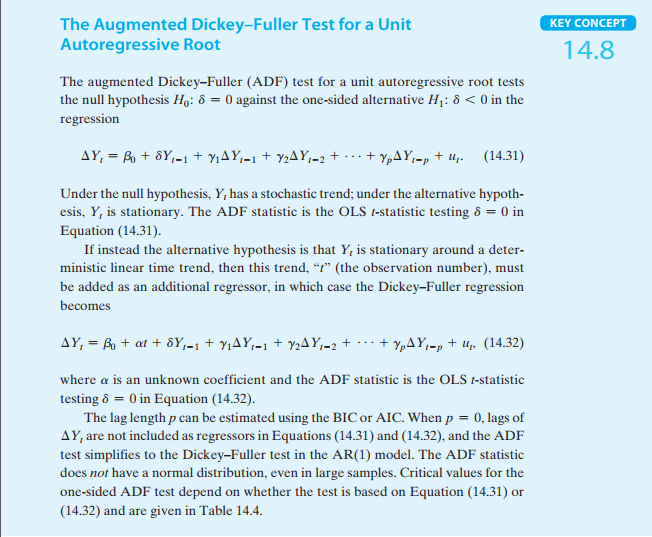

As mentioned above, since under the null hypothesis, $Y_t$ is not stationary, the usual OLS test statistic does not follow the standard Gaussian distribution; see discussion on impact of nonstationary on statistical inference in [linear regression](../machine-learning/supervised-learning/linear-regression.ipynb).

The intuition behind the test is that if the series is characterised by a unit root process then the lagged level of the series $Y_{t-1}$ will provide no relevant information in predicting the change in $\Delta Y_t$ besides the one obtained in the lagged changes. In this case $\delta=0$ and null hypothesis is not rejected. In contrast, when the process has no unit root, it is stationary and hence exhibits reversion to the mean - so the lagged level will provide relevant information in predicting the change of the series and the null of a unit root will be rejected.

As such, the ADF test can be used to detect mean-reverting time series: the more negative the test statistic is, the stronger the mean-reversion by way of shorter half life; see Page 46 of [< Algorithmic Trading >](https://www.evernote.com/shard/s191/nl/21353936/d7787d3b-4db3-c2f7-830f-6865f4403ee8?title=Algorithmic%20Trading%20Winning%20Strategies%20and%20Their%20Rationale).

The test is very sensitive to the choice of $p$. Beside using information criterions, it is suggested in the literature the following way to choose $p$. First fix a $p_{max} = [12(T/100)]^{1/2}$, where $T$ is the sample size. Second, keep reducing $p$ until you see the absolute value of the test statistic for the last lag is bigger than 1.615, which is the $90/%$ pencentile of the asymptotic distribution of the test statistic of rejecting the higher order $p$. Then report the p-value corresponding to this p.

## Johansen Test

The Johansen test, named after Søren Johansen, is a **procedure for testing cointegration of multiple, say $k$ time series**. This test permits more than one cointegrating relationship so is more generally applicable than the Engle–Granger test which is based on the Dickey–Fuller (or the augmented) test for unit roots in the residuals from a single (estimated) cointegrating relationship.

There are two types of Johansen test, either with trace or with eigenvalue, and the inferences might be a little bit different.
- The null hypothesis for the trace test is that the number of cointegration vectors is $r = r* < k$, vs the alternative that $r = k$. Testing proceeds sequentially for $r* = 1,2$, etc. and the first non-rejection of the null is taken as an estimate of r. 
- The null hypothesis for the "maximum eigenvalue" test is as for the trace test but the alternative is $r = r* + 1$ and, again, testing proceeds sequentially for $r* = 1,2$, etc., with the first non-rejection used as an estimator for $r$.

The specification of the test using vector error correction models (VECM, see [< Introduction to Econometrics >](https://www.evernote.com/shard/s191/nl/21353936/23a3b1a5-8f90-47a5-b796-d29931ba8db3?title=Introduction_to_Econometrics%EF%BC%8CUpdate%EF%BC%8C3e.pdf)) is as follows.

\begin{align}
\Delta X_t = \mu + \Phi D_t + \Pi X_{t-1} + \Gamma_1\Delta X_{t-1} + \dots + \Gamma_p\Delta X_{t-p} + \epsilon_t, t = 1, \dots, T. 
\end{align}

While the technical details and proof is not clear, one use of the Johansen test is to get the eigen vectors of $\Pi$ above, which can be used as weights to form a stationary time-series; see Page 54 of [< Algorithmic Trading >](https://www.evernote.com/shard/s191/nl/21353936/d7787d3b-4db3-c2f7-830f-6865f4403ee8?title=Algorithmic%20Trading%20Winning%20Strategies%20and%20Their%20Rationale).



## ARCH(m) Model

The basic idea of the ARCH model is to **produce a times series that is uncorrelated in itself,
but is dependent through some square functions**.

Specification: $r_t = \mu + a_t$, $a_t = \sigma_t \epsilon_t$, $\sigma_t^2 = \alpha_0 + \alpha_1a_{t-1}^2 + \dots + \alpha_ma_{t-m}^2$, where $\epsilon_t$ is a white noise with mean zero and $Var(\epsilon_t)=1$, $\alpha_i\geq 0$, $i=0,1,\dots, m$. It can be shown that $a_t$ has zero correlation but are dependent, and suitable in generating the volatility cluster effect. 
- $Var(a_t)=\frac{\alpha_0}{1-\sum_{i=1}^m\alpha_i}$
- **Quasi-AR representation**: $a^2_t=\alpha_0 + \alpha_1a_{t-1}^2 + \dots + \alpha_m a_{t-m}^2 + e_t$, where $e_t = a_t^2 - E(a_t^2|F_{t-1})=a_t^2 - \sigma_t^2$. It is clear that $e_t$ has zero mean, and it can also be shown that $e_t$ has zero correlation.
- The **Langrange multiplier (LM) test for the ARCH effect**. Use the above quasi-AR representation, and the LM tests the hypothesis $H_0: \alpha_1 = \dots = \alpha_m = 0$. The test statistic is 
\begin{align}
G = \frac{(SSR_0 - SSR_1)/m}{SSR_1/(T-2m-1)},
\end{align}
where $SSR_0=\sum_{t=m+1}^{T}(a_t^2-\bar{\omega})^2$, $\bar{\omega}=Mean(a_t^2)$, $SSR_1=\sum_{t=m+1}^T\hat{e}_t^2$.
- In the ARCH(m) forecasting, we only need to forecast $\sigma_t$ as $a_t$ is simply $\sigma_t\epsilon_t$. In general, the $l$-step forecast for $\sigma_{h+l}^2$ is given by $\sigma_h(l)=\alpha_0 + \sum_{i=1}^m\alpha_i\sigma_h^2(l-i)$, where $\sigma_h^2(l-i)=a_{h+l-i}^2$ if $l\leq i$.
- There are two ways to **determine the order m**: (1) use information criteria (always applicable) or (2) check the PACF of $r_t^2$. The intuition behind (2) is clear with the quasi-AR representation and similarly how AR(p) model's order is determined by PACF. In fact, it can be shown that all the PACF with order higher than m will tend to zero, as the sample size goes to infinite, though the convergence may be slower than that of an AR(p) model.
- Parameter estimation is done using conditional MLE.

## GARCH(m, n) Model

One problem with ARCH is that in practice it is often found that a large number of lags m is needed to obtain a good fit. This leads to GARCH models.

Specification: $r_t = \mu + a_t$, $a_t = \sigma_t \epsilon_t$, $\sigma_t^2 = \alpha_0 + \alpha_1a_{t-1}^2 + \dots + \alpha_ma_{t-m}^2 + \beta_1\sigma_{t-1}^2 + \dots + \beta_n\sigma_{t-n}^2 $, where $\epsilon_t$ is a white noise with mean zero and $Var(\epsilon_t)=1$

There are constraints on parameters
- $\alpha_0 > 0$, $\alpha_i > 0$, $\beta_j > 0$. This constraint is needed to ensure that big changes in previous $a_t^2$ leads to high volatility $\sigma_t$, and to ensure that the previous high volatility tends to high volatility in the future.
- $\sum_{i=1}^{\max(m, n)} (\alpha_i + \beta_i) < 1$, where it is understood that $\alpha_i = 0$ for $i > m$ and $\alpha_j = 0$ for $j > s$. This constraint is a **necessary (though not sufficient) condition** to ensure stationarity of GARCH(m,n). In fact, it implies that the unconditional variance of at is finite, as we will see below.

- **Quasi-ARMA representation**: $a_t^2 = \alpha_0 + \sum_{i=1}^{\max(m, n)}(\alpha_i + \beta_i)a_{t-i}^2 + \eta_t - \sum_{j=1}^n\beta_j\eta_{t-j}$, where $\eta_t = a_t^2 - \sigma_t^2$. Note that $\eta_t$ are martingale differences, so $E(\eta_t)=0$, $Cov(\eta_t, \eta_{t-j})=0$, for all $j\geq 1$. 
- Under the stationarity assumption and the quasi-ARMA representation above, $E(a_t^2) = \alpha_0 + E(a_t^2)\sum_{i=1}^{\max(m, n)}(\alpha_i + \beta_i)$, which implies $\sum_{i=1}^{\max(m, n)} (\alpha_i + \beta_i) < 1$, as mentioned above. Also note that since $E(a_t)=0$, $Var(a_t)=E(a_t^2)$, which is finite with $\sum_{i=1}^{\max(m, n)} (\alpha_i + \beta_i) < 1$.
- Notable properties 
    - **Volatility clustering** effect, same as the motivation of ARCH
    - **Leptokurtic feature** of $a_t$
    - **Volatility mean reversion**. In the simple example of a GARCH(1, 1), from above we have $Var(a_t)=\frac{\alpha_0}{1-(\alpha_1+\beta_1)}$, and thus $a_t^2-\frac{\alpha_0}{1-(\alpha_1+\beta_1)} = (\alpha_1 + \beta_1)(a_{t-1}^2-\frac{\alpha_0}{1-(\alpha_1+\beta_1)}) + \eta_t - \beta_1\eta_{t-1}$. Then just note that $\alpha_1 + \beta_1 < 1$.
    
- Parameter estimation is again due to conditional MLE.
- $l$-step forecasting for GARCH: $\sigma_h^2(l)=\alpha_0 + (\alpha_1+\beta_1)\sigma_h^2(l-1)$, $l>1$.

## Reference
 
- Steven Kou's formula sheet
- Steven Kou's Data Analysis for FE course
- [< Algorithmic Trading - Winning Strategies and Their Rational >](https://www.evernote.com/shard/s191/nl/21353936/d7787d3b-4db3-c2f7-830f-6865f4403ee8?title=Algorithmic%20Trading%20Winning%20Strategies%20and%20Their%20Rationale)